In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from pprint import pprint
from pathlib import Path


In [29]:
# Location of file
survey_2016 = "Resources/2016-cleaned.csv"

In [30]:
# Reading the data
s_2016_data = pd.read_csv(survey_2016)
s_2016_data.head()

,Unnamed: 0,age,original_gender,gender,country,remote,num_employees,disorder_past,disorder_current,bring_up_phys_issue_in_interview,bring_up_mh_issue_in_interview,obs_exper_bad_resp_cur_prev,obs_of_other_inhibit_discuss_curr,comf_discuss_mh_disorder_cur_superv,willing_discuss_mh_issue_prev_superv,request_med_leave,age groups
0,0,39,Male,male,United Kingdom,Sometimes,26-100,Yes,No,Maybe,Maybe,No,No Response,Yes,Some of my previous employers,Very easy,35-44
1,1,29,male,male,United States of America,Never,6-25,Yes,Yes,Maybe,No,No,No Response,Yes,Some of my previous employers,Somewhat easy,25-34
2,2,38,Male,male,United Kingdom,Always,6-25,Maybe,No,Yes,Yes,Maybe/Not sure,Yes,Maybe,I don't know,Neither easy nor difficult,35-44
3,3,43,male,male,United Kingdom,Sometimes,No Response,Yes,Yes,Yes,Maybe,No,No Response,No Response,Some of my previous employers,No Response,35-44
4,4,43,Female,female,United States of America,Sometimes,6-25,Yes,Yes,Maybe,No,"Yes, I experienced",Yes,No,Some of my previous employers,Neither easy nor difficult,35-44


In [34]:
#Create new dataframe for country and comfort 
country_comfort = s_2016_data[['country', 'comf_discuss_mh_disorder_cur_superv']]
country_comfort

,country,comf_discuss_mh_disorder_cur_superv
0,United Kingdom,Yes
1,United States of America,Yes
2,United Kingdom,Maybe
3,United Kingdom,No Response
4,United States of America,No
...,...,...
1423,United States of America,No Response
1424,Afghanistan,No Response
1425,United States of America,Yes
1426,United States of America,Yes


In [35]:
response_count_by_country = country_comfort['country'].value_counts()
print(response_count_by_country)

country
United States of America    849
United Kingdom              183
Canada                       72
Germany                      58
Netherlands                  47
Australia                    34
Sweden                       20
Ireland                      15
France                       14
Switzerland                  10
India                         9
Russia                        9
New Zealand                   9
Brazil                        9
Denmark                       7
Bulgaria                      7
Finland                       7
Belgium                       5
South Africa                  4
Poland                        4
Austria                       4
Italy                         3
Czech Republic                3
Spain                         3
Chile                         3
Norway                        3
Romania                       3
Bosnia and Herzegovina        2
Afghanistan                   2
Pakistan                      2
Israel                        2


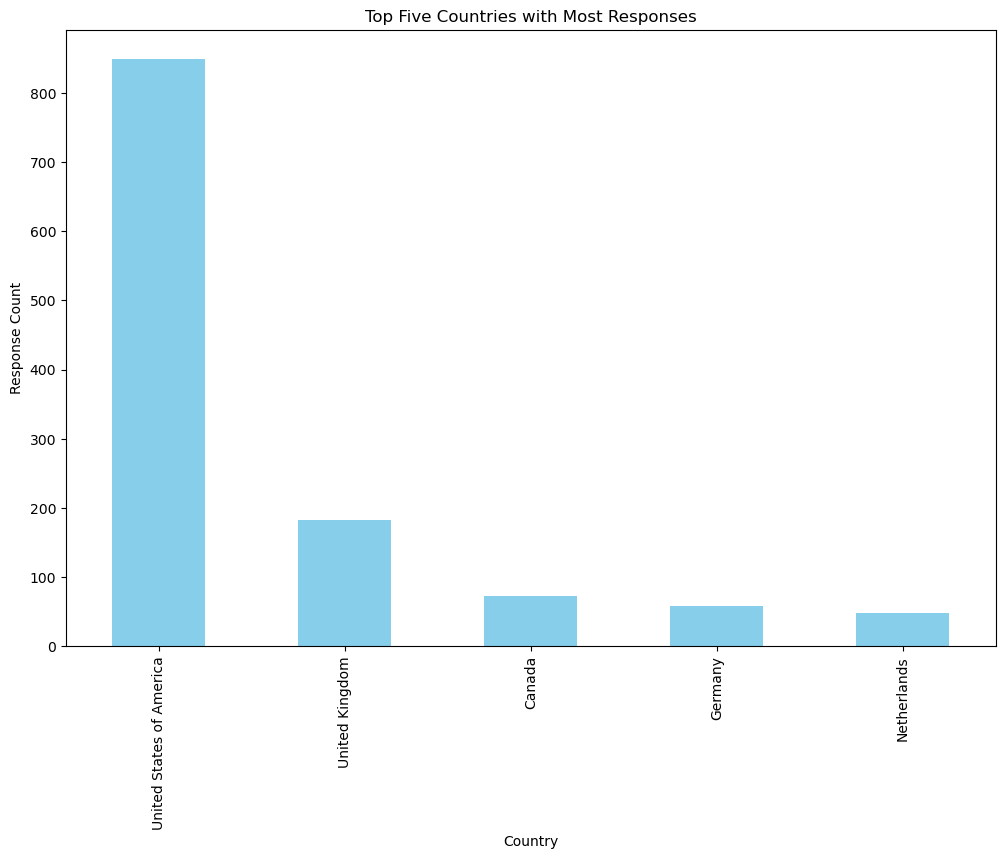

In [52]:
response_count_by_country = country_comfort['country'].value_counts()

# Get the top five countries
top_countries = response_count_by_country.head(5)

# Plot a bar chart
top_countries.plot(kind='bar', figsize=(12, 8), color='skyblue')
plt.title('Top Five Countries with Most Responses')
plt.xlabel('Country')
plt.ylabel('Response Count')
plt.show()

In [50]:
summary_by_country = country_comfort.groupby('country')['comf_discuss_mh_disorder_cur_superv'].describe()
print(summary_by_country)

                         count unique          top freq
country                                                
Afghanistan                  2      2          Yes    1
Argentina                    1      1           No    1
Australia                   34      4        Maybe   11
Austria                      4      2  No Response    3
Bangladesh                   1      1        Maybe    1
Belgium                      5      3        Maybe    2
Bosnia and Herzegovina       2      2           No    1
Brazil                       9      3           No    6
Brunei                       1      1  No Response    1
Bulgaria                     7      3           No    3
Canada                      72      4        Maybe   23
Chile                        3      2           No    2
China                        1      1  No Response    1
Colombia                     2      2        Maybe    1
Costa Rica                   1      1  No Response    1
Czech Republic               3      2  No Respon

In [48]:
# Assuming 'comf_discuss_mh_disorder_cur_superv' contains text responses
response_counts_by_country = country_comfort.groupby(['country', 'comf_discuss_mh_disorder_cur_superv']).size().reset_index(name='response_count')

# Display the result
print(response_counts_by_country)

                      country comf_discuss_mh_disorder_cur_superv  \
0                 Afghanistan                         No Response   
1                 Afghanistan                                 Yes   
2                   Argentina                                  No   
3                   Australia                               Maybe   
4                   Australia                                  No   
..                        ...                                 ...   
114  United States of America                                  No   
115  United States of America                         No Response   
116  United States of America                                 Yes   
117                 Venezuela                         No Response   
118                   Vietnam                               Maybe   

     response_count  
0                 1  
1                 1  
2                 1  
3                11  
4                 4  
..              ...  
114             2

In [49]:
# Sorting by country
response_counts_by_country = country_comfort.groupby(['country', 'comf_discuss_mh_disorder_cur_superv']).size().reset_index(name='response_count')

# Pivot the DataFrame to have responses as columns
pivot_response_counts = response_counts_by_country.pivot(index='country', columns='comf_discuss_mh_disorder_cur_superv', values='response_count').fillna(0)

# Display the result
print(pivot_response_counts)

comf_discuss_mh_disorder_cur_superv  Maybe     No  No Response    Yes
country                                                              
Afghanistan                            0.0    0.0          1.0    1.0
Argentina                              0.0    1.0          0.0    0.0
Australia                             11.0    4.0          8.0   11.0
Austria                                1.0    0.0          3.0    0.0
Bangladesh                             1.0    0.0          0.0    0.0
Belgium                                2.0    1.0          2.0    0.0
Bosnia and Herzegovina                 1.0    1.0          0.0    0.0
Brazil                                 0.0    6.0          1.0    2.0
Brunei                                 0.0    0.0          1.0    0.0
Bulgaria                               0.0    3.0          1.0    3.0
Canada                                23.0   19.0         12.0   18.0
Chile                                  0.0    2.0          0.0    1.0
China               

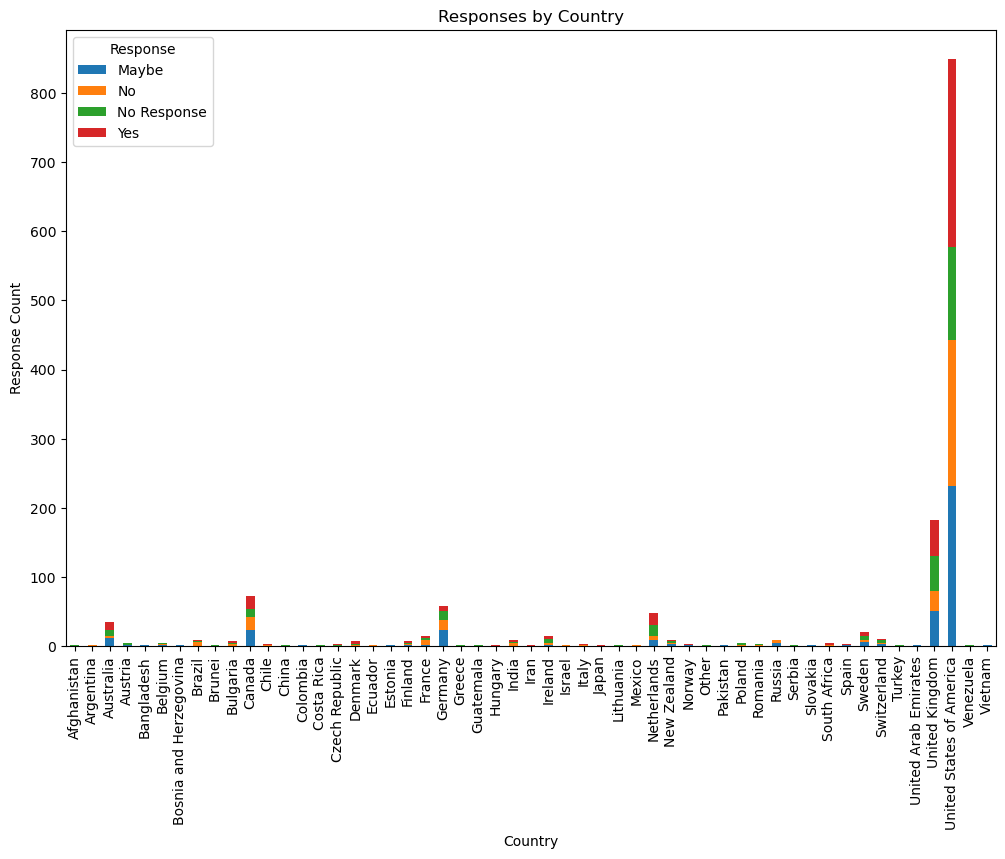

In [45]:
pivot_response_counts.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Responses by Country')
plt.xlabel('Country')
plt.ylabel('Response Count')
plt.legend(title='Response')
plt.show()

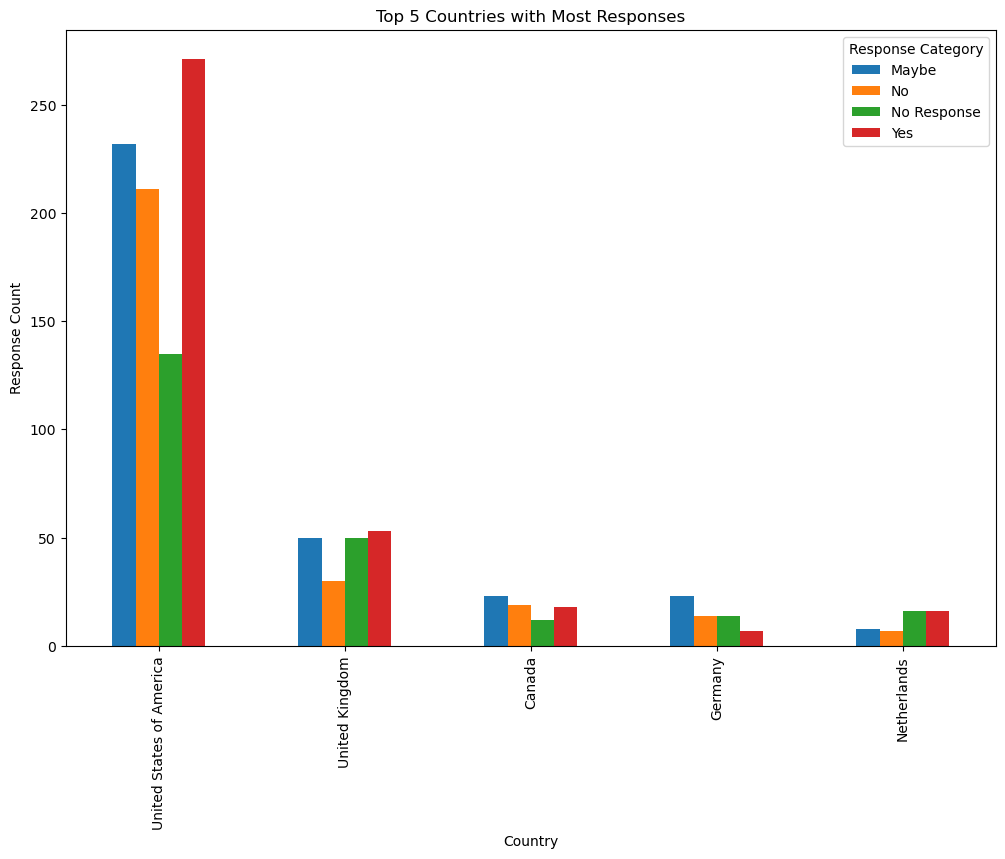

In [59]:
# Country responses
response_counts_by_country = country_comfort.groupby(['country', 'comf_discuss_mh_disorder_cur_superv']).size().reset_index(name='response_count')

# Pivot the DataFrame to have responses as columns
pivot_response_counts = response_counts_by_country.pivot(index='country', columns='comf_discuss_mh_disorder_cur_superv', values='response_count').fillna(0)

# Add a column for total response counts
pivot_response_counts['total_responses'] = pivot_response_counts.sum(axis=1)

# Get the top 5 countries by total response counts
top_countries = pivot_response_counts.nlargest(5, 'total_responses')

# Plot a bar chart
top_countries.drop('total_responses', axis=1).plot(kind='bar', stacked=False, figsize=(12, 8))
plt.title('Top 5 Countries with Most Responses')
plt.xlabel('Country')
plt.ylabel('Response Count')
plt.legend(title='Response Category')
plt.savefig("Resources/Top_5_Countries.png")
plt.show()

<Figure size 640x480 with 0 Axes>